# Basic Stock Data Analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import date
import matplotlib
import scienceplots
plt.style.use('science')

## Get stock data

We begin by retrieving 10 years' worth of stock data for 3 mega-cap tech companies.

In [15]:
start = date(2014,1,1)
end = date(2024,11,7)

In [16]:
tickers = ['AAPL','MSFT','NVDA']

In [17]:
stocks = dict()

for ticker in tickers:
    stocks[ticker] = yf.Ticker(ticker).history(start=start, end=end)

/opt/anaconda3/envs/pyfinance/lib/python3.12/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/opt/anaconda3/envs/pyfinance/lib/python3.12/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/opt/anaconda3/envs/pyfinance/lib/python3.12/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [18]:
for ticker in tickers:
    print(ticker)
    print(stocks[ticker].head())

AAPL
                                Open       High        Low      Close  \
Date                                                                    
2014-01-02 00:00:00-05:00  17.332798  17.374907  17.218635  17.253258   
2014-01-03 00:00:00-05:00  17.244835  17.271035  16.857117  16.874273   
2014-01-06 00:00:00-05:00  16.764160  17.055804  16.644070  16.966284   
2014-01-07 00:00:00-05:00  16.978459  17.029614  16.778830  16.844957   
2014-01-08 00:00:00-05:00  16.806587  17.017134  16.802846  16.951632   

                              Volume  Dividends  Stock Splits  
Date                                                           
2014-01-02 00:00:00-05:00  234684800        0.0           0.0  
2014-01-03 00:00:00-05:00  392467600        0.0           0.0  
2014-01-06 00:00:00-05:00  412610800        0.0           0.0  
2014-01-07 00:00:00-05:00  317209200        0.0           0.0  
2014-01-08 00:00:00-05:00  258529600        0.0           0.0  
MSFT
                              

## Cleaning and Preprocessing Data


We check for missing values and add some additional features for further analysis.

In [19]:
for ticker in tickers:
    stocks[ticker].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2731 entries, 2014-01-02 00:00:00-05:00 to 2024-11-06 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2731 non-null   float64
 1   High          2731 non-null   float64
 2   Low           2731 non-null   float64
 3   Close         2731 non-null   float64
 4   Volume        2731 non-null   int64  
 5   Dividends     2731 non-null   float64
 6   Stock Splits  2731 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 170.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2731 entries, 2014-01-02 00:00:00-05:00 to 2024-11-06 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2731 non-null   float64
 1   High          2731 non-null   float64
 2   Low           2731 non-null   float64
 3   Close         2731 non-null   flo

In [20]:
for ticker in tickers:
    print(stocks[ticker][['Dividends','Stock Splits']].value_counts())

Dividends  Stock Splits
0.000000   0.0             2686
0.117500   0.0                4
0.130000   0.0                4
0.142500   0.0                4
0.157500   0.0                4
0.182500   0.0                4
0.192500   0.0                4
0.205000   0.0                4
0.220000   0.0                4
0.230000   0.0                4
0.240000   0.0                4
0.250000   0.0                2
0.000000   4.0                1
           7.0                1
0.108929   0.0                1
Name: count, dtype: int64
Dividends  Stock Splits
0.00       0.0             2688
0.31       0.0                4
0.36       0.0                4
0.39       0.0                4
0.42       0.0                4
0.46       0.0                4
0.51       0.0                4
0.56       0.0                4
0.62       0.0                4
0.68       0.0                4
0.75       0.0                4
0.28       0.0                3
Name: count, dtype: int64
Dividends  Stock Splits
0.000000   0

As none of the stocks underwent significant splits during the period, we drop the 'Stock Splits' column.

In [21]:
for ticker in tickers:
    stocks[ticker].drop(['Stock Splits'], axis=1, inplace=True)

## Add new features

We add the daily returns to each stock, based on the closing price of each.

We define a calculate_returns function to calculate logarithmic returns and daily returns in a reusable fashion.

In [22]:
def calculate_returns(data, method='log'):
    if method == 'log':
        data['Logarithmic Returns'] = np.log(data['Close']/data['Close'].shift(1))
    else:
        data['Daily Returns'] = data['Close'].pct_change(1)
    return data

In [23]:
for ticker in tickers:
    calculate_returns(stocks[ticker])
    calculate_returns(stocks[ticker],method='not log')
    stocks[ticker].dropna(inplace=True)

In [24]:
stocks['AAPL'].head()

,Open,High,Low,Close,Volume,Dividends,Logarithmic Returns,Daily Returns
Date,,,,,,,,
2014-01-03 00:00:00-05:00,17.244835,17.271035,16.857117,16.874273,392467600,0.0,-0.022211,-0.021966
2014-01-06 00:00:00-05:00,16.764160,17.055804,16.644070,16.966284,412610800,0.0,0.005438,0.005453
2014-01-07 00:00:00-05:00,16.978459,17.029614,16.778830,16.844957,317209200,0.0,-0.007177,-0.007151
2014-01-08 00:00:00-05:00,16.806587,17.017134,16.802846,16.951632,258529600,0.0,0.006313,0.006333
2014-01-09 00:00:00-05:00,17.055810,17.057683,16.698662,16.735157,279148800,0.0,-0.012852,-0.012770


## Combine Returns into a single DataFrame

We combine the returns to form a single dataframe for susbequent analysis.

In [25]:
returns_df = pd.DataFrame(dict([(ticker,stocks[ticker]['Logarithmic Returns']) for ticker in tickers]))

In [26]:
returns_df.head()

,AAPL,MSFT,NVDA
Date,,,
2014-01-03 00:00:00-05:00,-0.022211,-0.006750,-0.012052
2014-01-06 00:00:00-05:00,0.005438,-0.021359,0.013312
2014-01-07 00:00:00-05:00,-0.007177,0.007720,0.016240
2014-01-08 00:00:00-05:00,0.006313,-0.018014,0.013539
2014-01-09 00:00:00-05:00,-0.012852,-0.006453,-0.037999


We now have all the tools we need to begin a basic analysis of the stock data.

## Basic Data Analysis and Visualisation

This notebook aims to illustrate how basic stock analysis can be carried out and how core technical indicators can be implemented from first principles.

We start by plotting the closing prices of each stock.

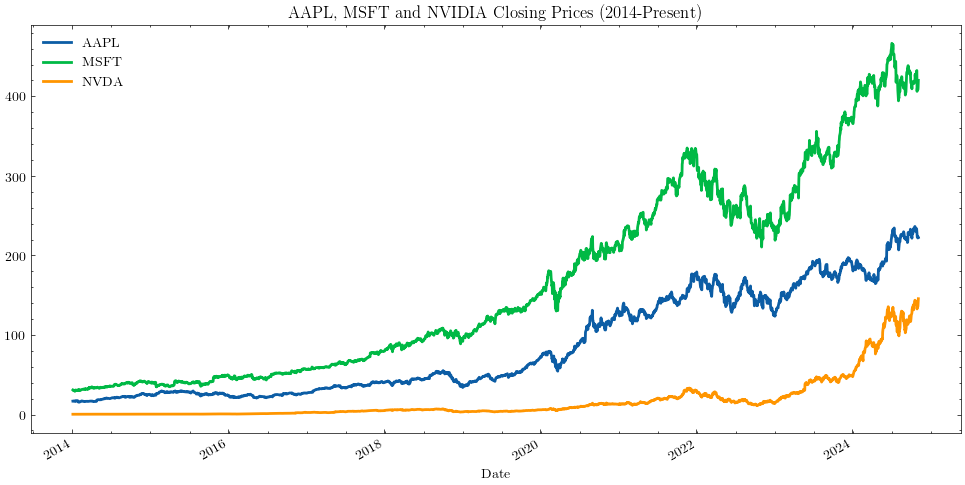

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
for ticker in tickers:
    stocks[ticker]['Close'].plot(label=ticker, lw=2)

plt.title('AAPL, MSFT and NVIDIA Closing Prices (2014-Present)')
plt.xlabel('Date')
plt.legend()
plt.show()

It would be interesting to see which of these stocks was the most volatile over the entire period. We can do that by using the distribution of the log of daily returns as a proxy for volatility.

## Boxplot of logarithmic daily returns

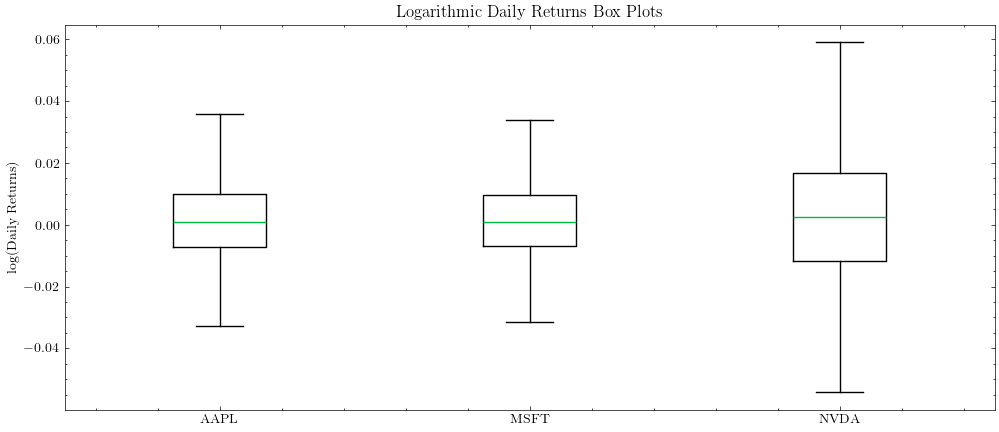

In [42]:
fig, ax = plt.subplots(figsize=(12,5))
returns = [stocks[ticker]['Logarithmic Returns'].dropna().values for ticker in tickers]
labels = ['AAPL','MSFT','NVDA']
ax.boxplot(returns, showfliers=False, tick_labels=labels)
ax.set_ylabel('log(Daily Returns)')
plt.title('Logarithmic Daily Returns Box Plots')
plt.show()

The above boxplots show that Nvidia was the most volatile stock. This can also be seen in an overlayed histogram.

## Logarithmic Daily Returns Histogram

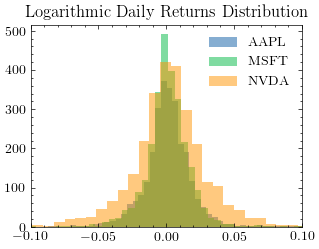

In [43]:
fig, ax = plt.subplots()

for i in range(len(returns)):
    ax.hist(returns[i], bins=60, alpha=0.5, label=labels[i])

ax.set_xlim([-0.1,0.1])
plt.legend()
plt.title('Logarithmic Daily Returns Distribution')
plt.show()

NVDA's greater volatility over the period is abundantly clear in a time series plot.

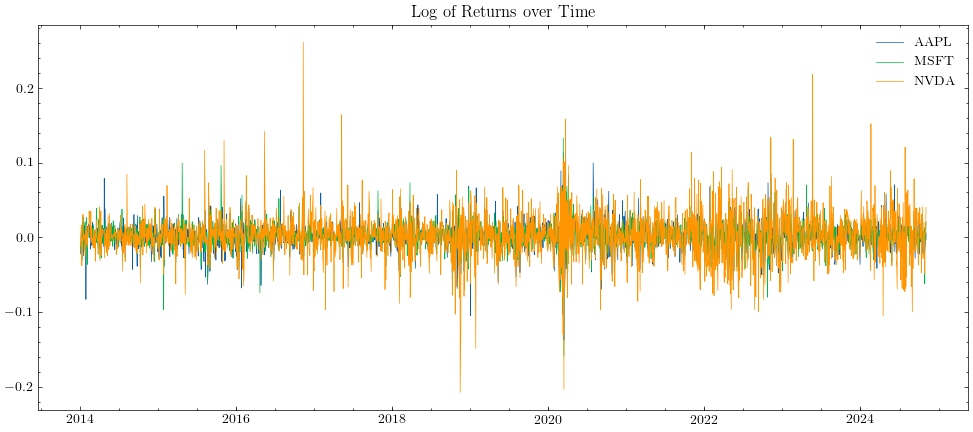

In [45]:
fig, ax = plt.subplots(figsize=(12,5))
for column in list(returns_df.columns):
    ax.plot(returns_df[column], label=column, lw=0.5)
plt.legend()
plt.title('Log of Returns over Time')
plt.show()

When modelling historical volatility, it is often useful to look at how volatility evolved over the lifetime of your stock data. We define 200-day rolling volatility below for this reason.

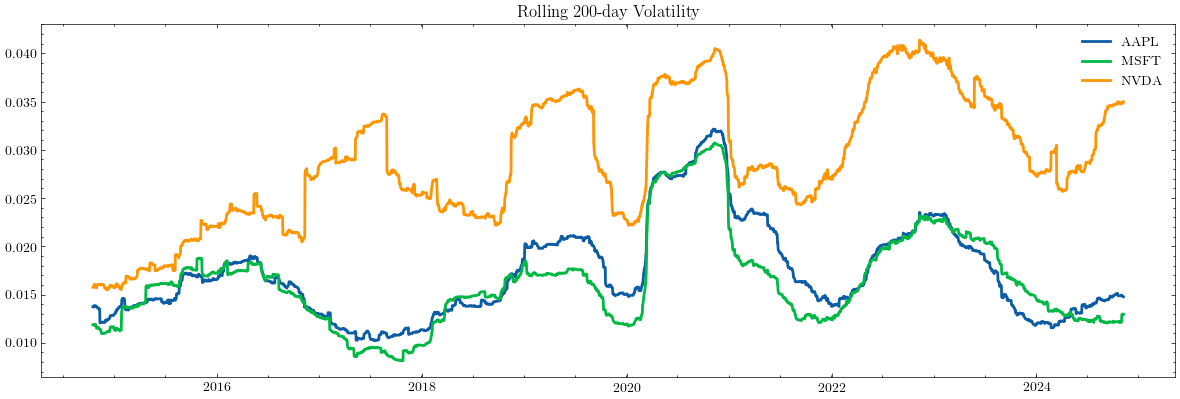

In [46]:
fig, ax = plt.subplots(figsize=(12,4))
for ticker in tickers:
    ax.plot(stocks[ticker]['Logarithmic Returns'].rolling(window=200).std(), label=ticker,lw=2)
plt.legend(loc='upper right')
plt.tight_layout()
plt.title('Rolling 200-day Volatility')
plt.show()

## Return correlations

It is also interesting to see the correlation between the returns of each stock. We first create a returns dataframe for use in the sns.pairplot function.

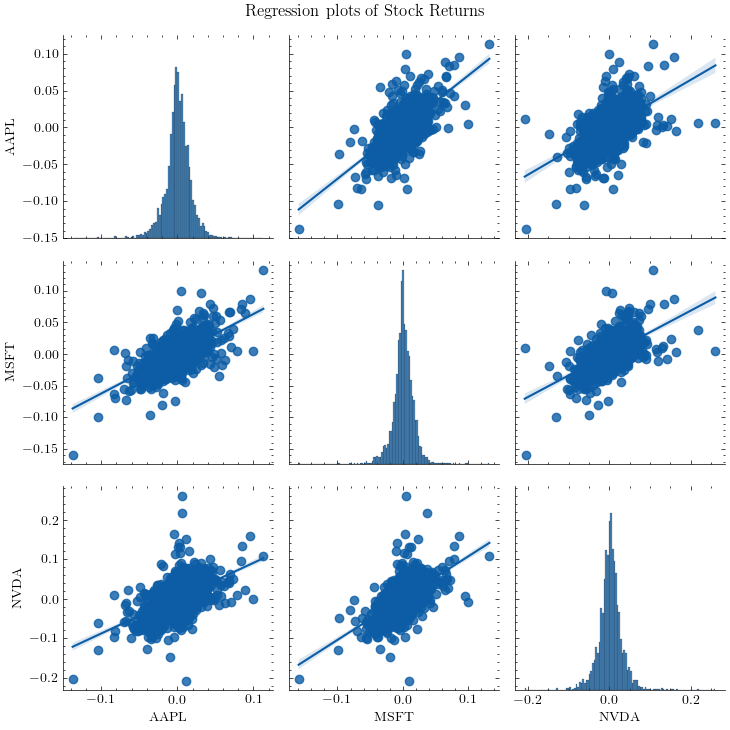

In [52]:
g = sns.pairplot(returns_df, kind='reg')
g.figure.suptitle('Regression plots of Stock Returns')

plt.tight_layout()
plt.show()

The above suggests that MSFT and NVDA exhibit higher correlation than NVDA and AAPL. Indeed, this is confirmed in the following correlation matrix:

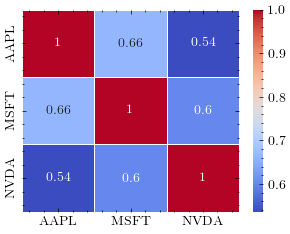

In [54]:
sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## Technical Indicators

Among the more ubiquitous ways of analysing a stock include the use of technical indicators. We overlay some of these on the price series.

We begin by defining a moving average function to promote code reuse.

### Simple Moving Averages

In [58]:
def calculate_moving_average(data, short_window=100, long_window=300):
    data[f'{short_window}-day MA'] = data['Close'].rolling(window=short_window).mean()
    data[f'{long_window}-day MA'] = data['Close'].rolling(window=long_window).mean()
    return data

In [59]:
for ticker in tickers:
    calculate_moving_average(stocks[ticker])

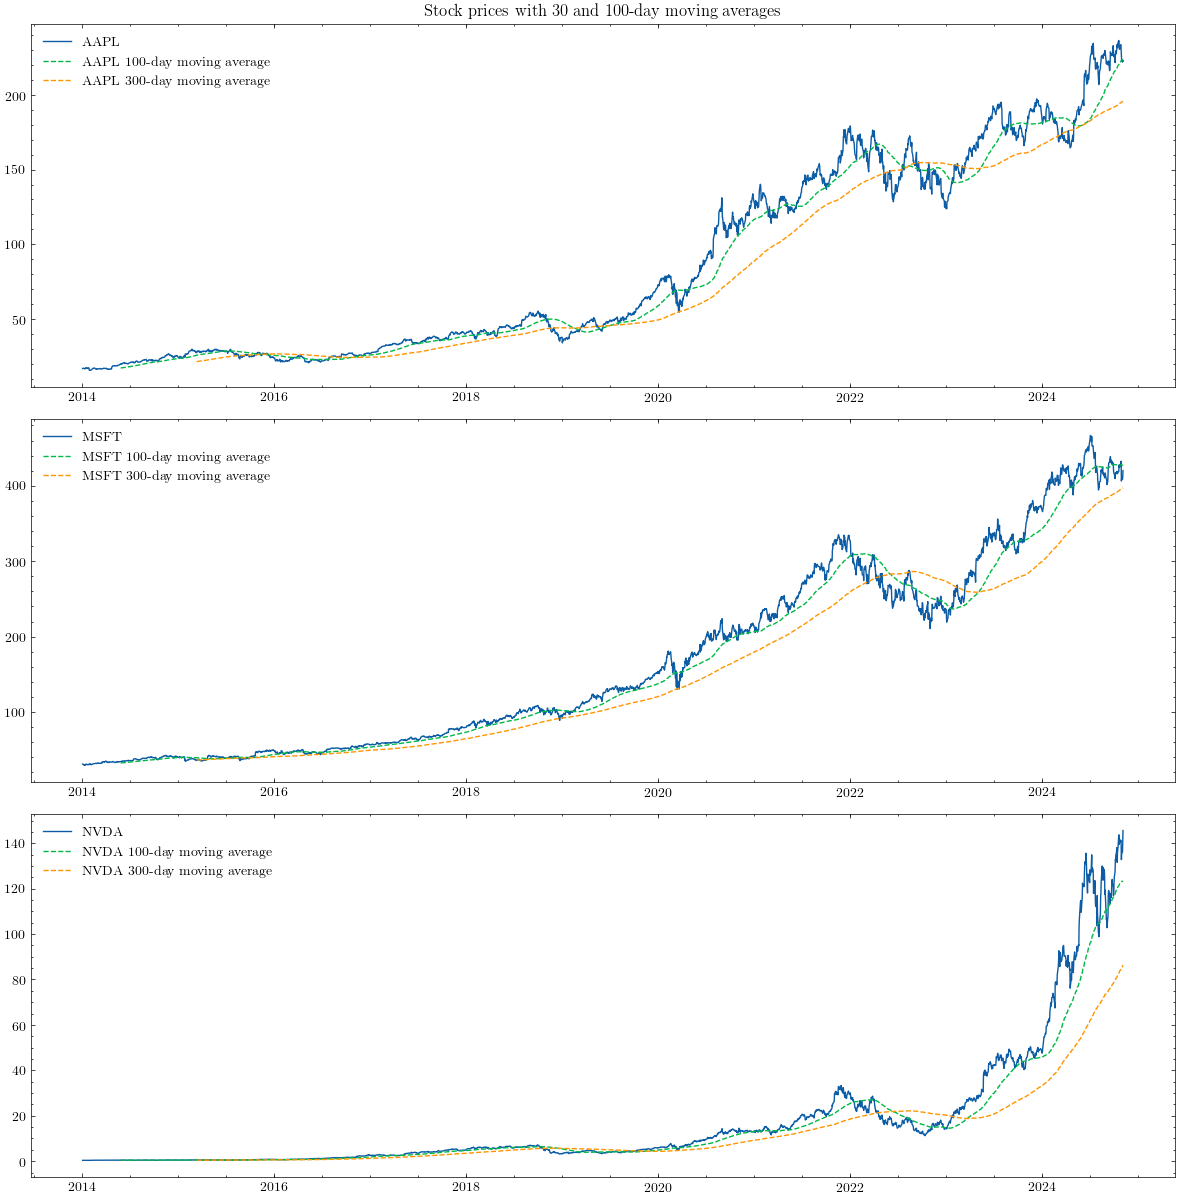

In [61]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(12,12))

i = 0
for ticker in tickers:
    ax[i].plot(stocks[ticker]['Close'], label=ticker)
    ax[i].plot(stocks[ticker]['100-day MA'], linestyle ='--', label=ticker+' 100-day moving average')
    ax[i].plot(stocks[ticker]['300-day MA'], linestyle='--',label=ticker+' 300-day moving average')
    ax[i].legend()
    i+=1

plt.tight_layout()
ax[0].set_title('Stock prices with 30 and 100-day moving averages')
plt.show()

### Sharpe Ratio

We define a function to calculate the Sharpe ratio of a stock in order to enable us to understand risk-adjusted returns.

In [62]:
def calculate_sharpe_ratio(data, risk_free_rate=0.1):
    mean_return = data['Logarithmic Returns'].mean()
    return_std = data['Logarithmic Returns'].std()
    sharpe_ratio = (mean_return-risk_free_rate)/return_std
    return sharpe_ratio

It may also prove insightful to look at the sharpe ratio on a rolling basis, so we define a function to do so below.

In [65]:
def calculate_annualized_rolling_sharpe(data, risk_free_rate=0.1, window=252):
    rolling_mean = data['Logarithmic Returns'].rolling(window=window).mean()
    rolling_std = data['Logarithmic Returns'].rolling(window=window).std()
    rolling_sharpe = (window**0.5)*(rolling_mean-risk_free_rate)/rolling_std
    return rolling_sharpe

<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
/var/folders/9b/9prwr0cn2tb9l5r4911t9l6m0000gn/T/ipykernel_58987/1843147522.py:11: SyntaxWarning: invalid escape sequence '\$'
  ax[i][0].set_ylabel('Closing Price (\$)')


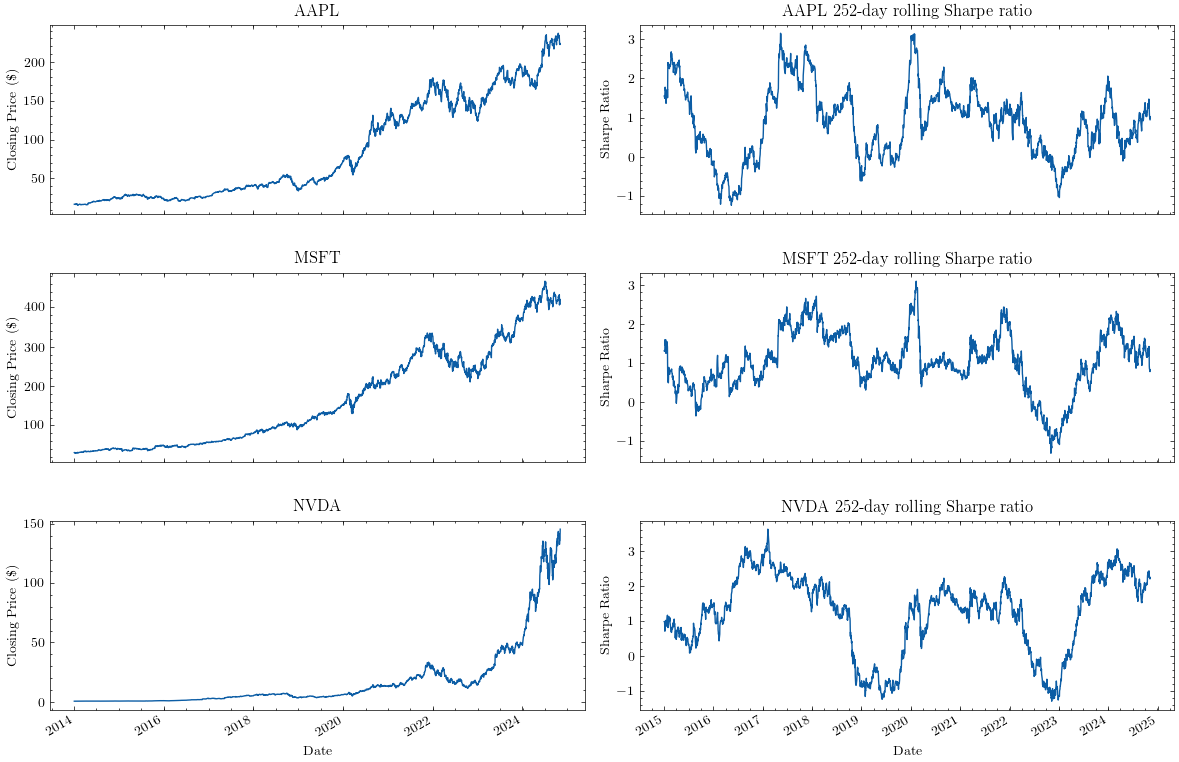

In [66]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,9))
i=0
window = 252
risk_free_rate = 0.1/2520
for ticker in tickers:
    ax[i][0].plot(stocks[ticker]['Close'])
    ax[i][1].plot(calculate_annualized_rolling_sharpe(stocks[ticker],risk_free_rate=risk_free_rate,window=window))  
    ax[i][0].set_title(ticker)
    ax[i][1].set_title(ticker+' '+str(window)+'-day rolling Sharpe ratio')
    ax[i][0].set_xlabel('Date')
    ax[i][0].set_ylabel('Closing Price (\$)')
    ax[i][1].set_xlabel('Date')
    ax[i][1].set_ylabel('Sharpe Ratio')
    i+=1
plt.tight_layout()
fig.autofmt_xdate()
plt.show()

### Bollinger Bands

Bollinger bands are another well known technical indicator, commonly used in mean reversion strategies. We define a simple function to add them to a price graph.

In [77]:
def calculate_bollinger_bands(data,window=100,no_std=2):
    data['Rolling Mean'] = data['Close'].rolling(window=window).mean()
    data['Rolling std'] = data['Close'].rolling(window=window).std()
    data['Lower Bollinger Band'] = data['Rolling Mean']-no_std*data['Rolling std']
    data['Upper Bollinger Band'] = data['Rolling Mean']+no_std*data['Rolling std']
    return data

In [78]:
for ticker in tickers:
    stocks[ticker] = calculate_bollinger_bands(stocks[ticker])

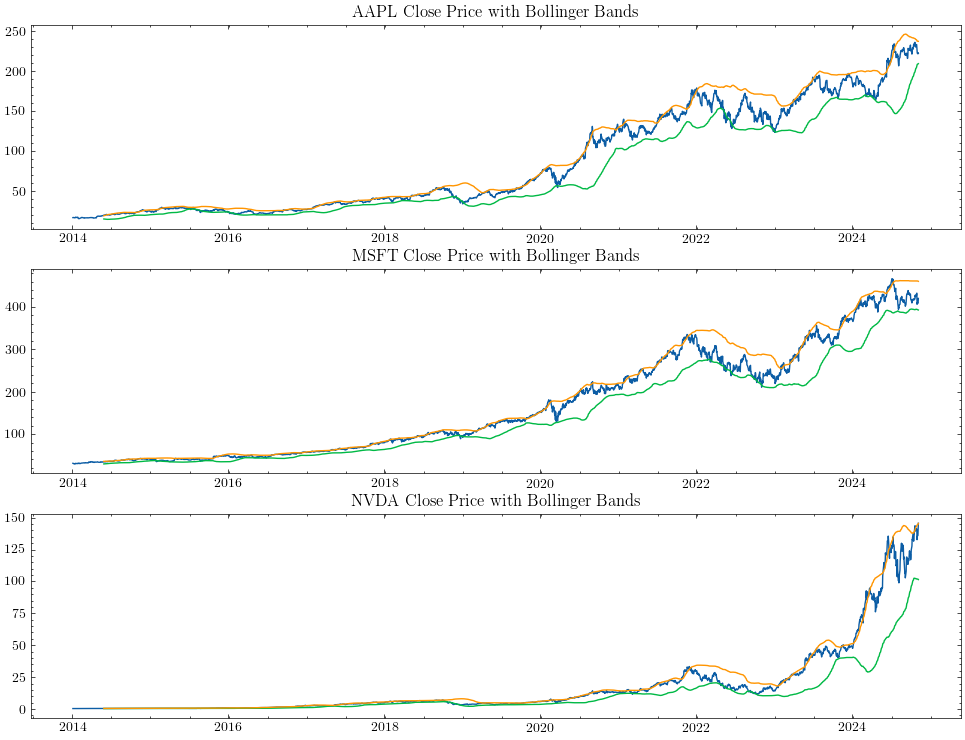

In [79]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,9))
i = 0
for ticker in tickers:
    ax[i].plot(stocks[ticker][['Close','Lower Bollinger Band','Upper Bollinger Band']])
    ax[i].set_title(ticker+' Close Price with Bollinger Bands')
    i+=1
plt.show()